In [1]:
#FOR EDA
import pandas as pd
import numpy as np

#FOR VISUALS
import matplotlib.pyplot as plt
import seaborn as sns

#FOR DATA PREPROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#CLASSIFIER LIBRARIES
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# !pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# EVALUATION METRICS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Downloads\Loan_default - Loan_default ML.csv')

In [3]:
data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
data.shape

(255347, 18)

In [6]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [7]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
data.describe(include=["object", "bool"])

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [11]:
data["NumCreditLines"].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

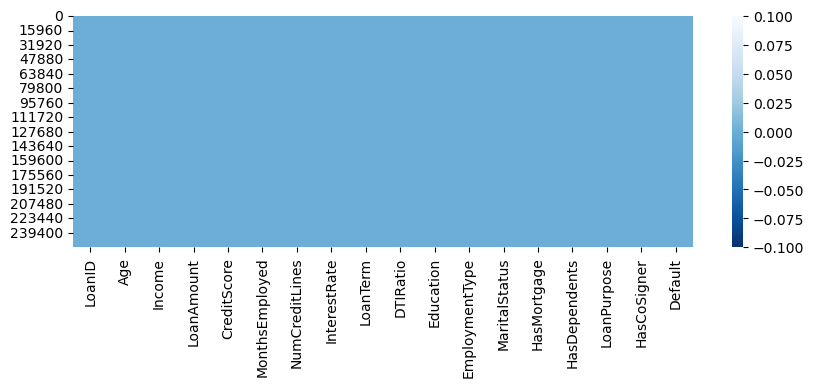

In [12]:
data.isnull().sum()
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r");

In [13]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [14]:
data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [15]:
data.drop('LoanID',axis=1, inplace=True)

In [16]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [17]:
actual_observed_categorical_columns = data[['NumCreditLines', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
                                        ]]

In [18]:
actual_observed_categorical_columns

,NumCreditLines,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,4,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,1,Master's,Full-time,Married,No,No,Other,Yes
2,3,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,3,High School,Full-time,Married,No,No,Business,No
4,4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...
255342,4,Bachelor's,Full-time,Married,No,No,Other,No
255343,2,High School,Part-time,Divorced,No,No,Home,No
255344,3,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,1,High School,Part-time,Single,Yes,Yes,Other,No


In [19]:
actual_observed_numerical_columns = data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate',
                                         'LoanTerm', 'DTIRatio']]

In [20]:
actual_observed_numerical_columns.head(1)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,15.23,36,0.44


# UNIVARIATE ANALYSIS

In [22]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


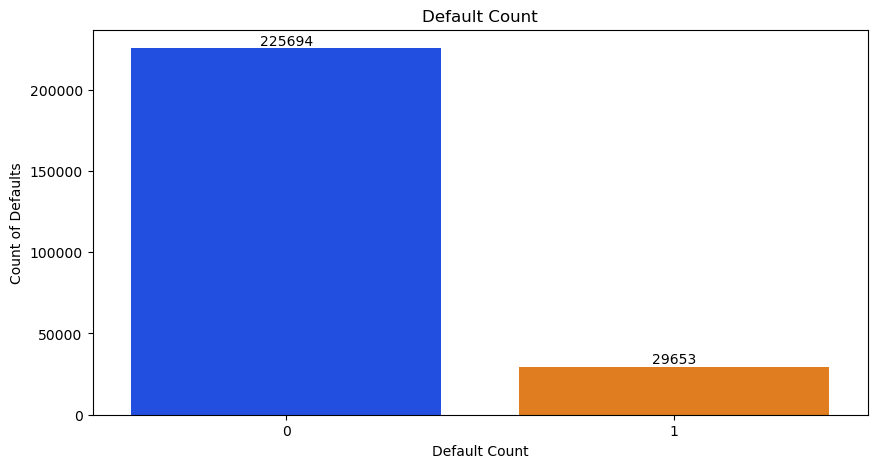

In [23]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Default", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Default Count')
plt.ylabel('Count of Defaults')
plt.title('Default Count');

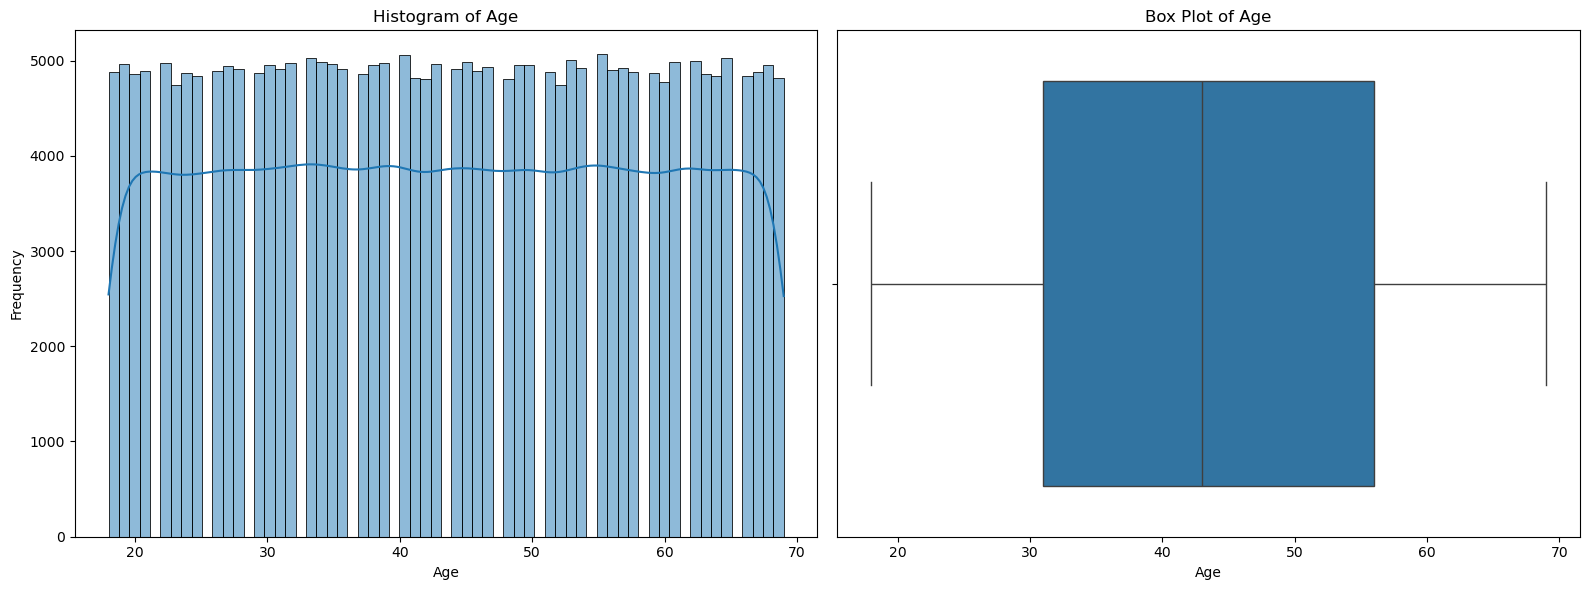

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=data, x="Age", kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=data, x="Age", ax=axes[1])
axes[1].set_title('Box Plot of Age')
axes[1].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [25]:
# Define the age_group function
def age_bracket(x):
    if x <= 18:
        return "Teen (<=18)"
    elif x<=35:
        return "youth(<=35)"
    elif x <= 55:
        return "Adult(<=55)"
    elif x <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elder(>65)"

data["age_bracket"] = data["Age"].apply(age_bracket)
data.head(2)   

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_bracket
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult(<=65)
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Elder(>65)


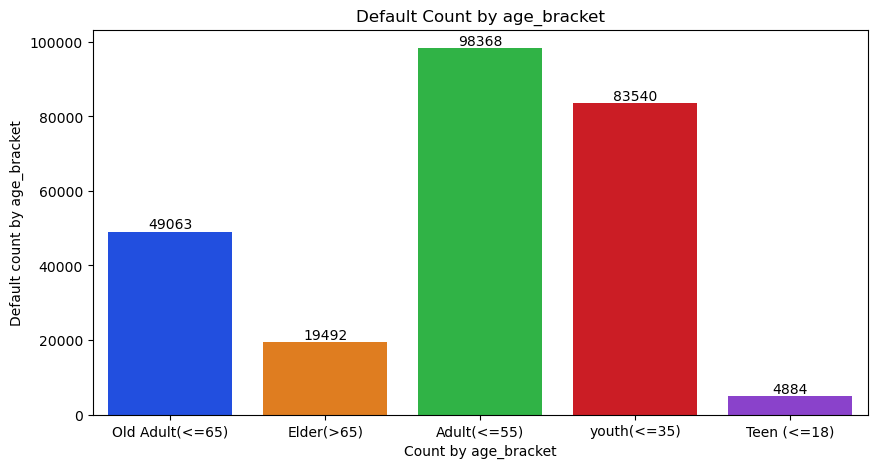

In [26]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="age_bracket", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by age_bracket')
plt.ylabel('Default count by age_bracket')
plt.title('Default Count by age_bracket');

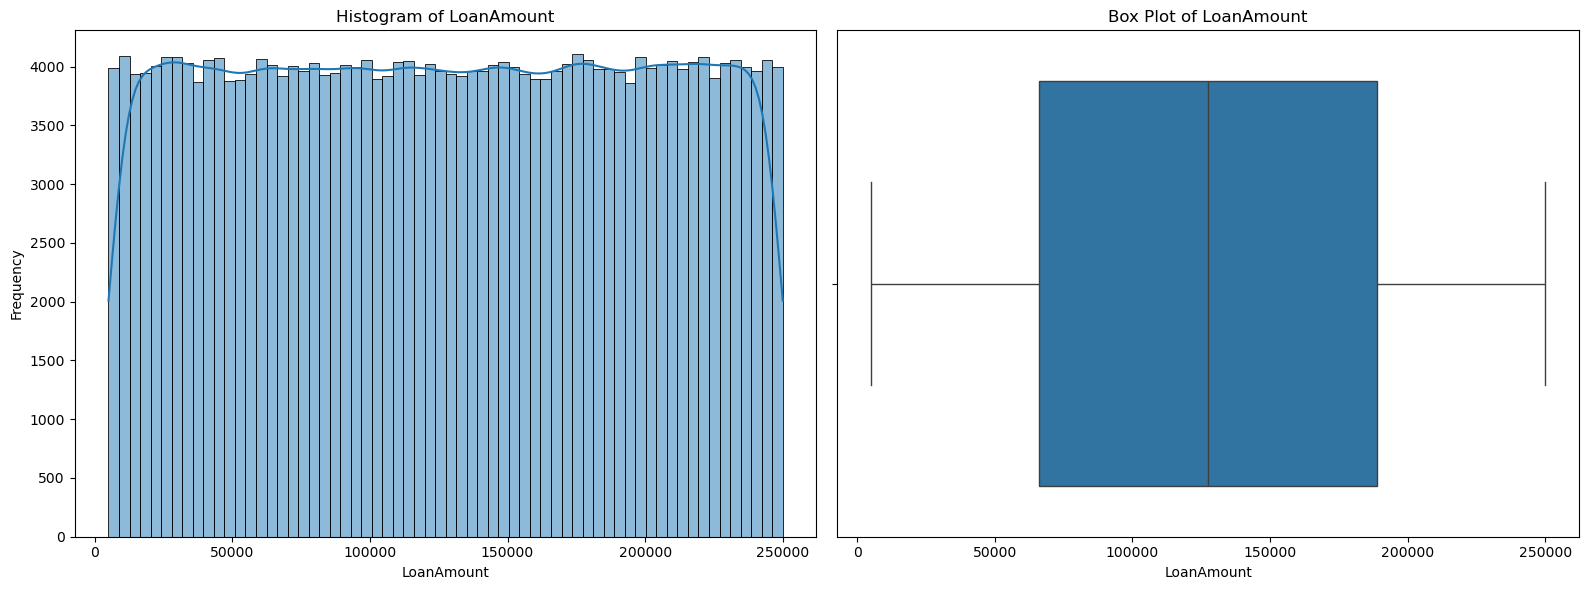

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=data, x="LoanAmount", kde=True, ax=axes[0])
axes[0].set_title('Histogram of LoanAmount')
axes[0].set_xlabel('LoanAmount')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=data, x="LoanAmount", ax=axes[1])
axes[1].set_title('Box Plot of LoanAmount')
axes[1].set_xlabel('LoanAmount')

plt.tight_layout()
plt.show()

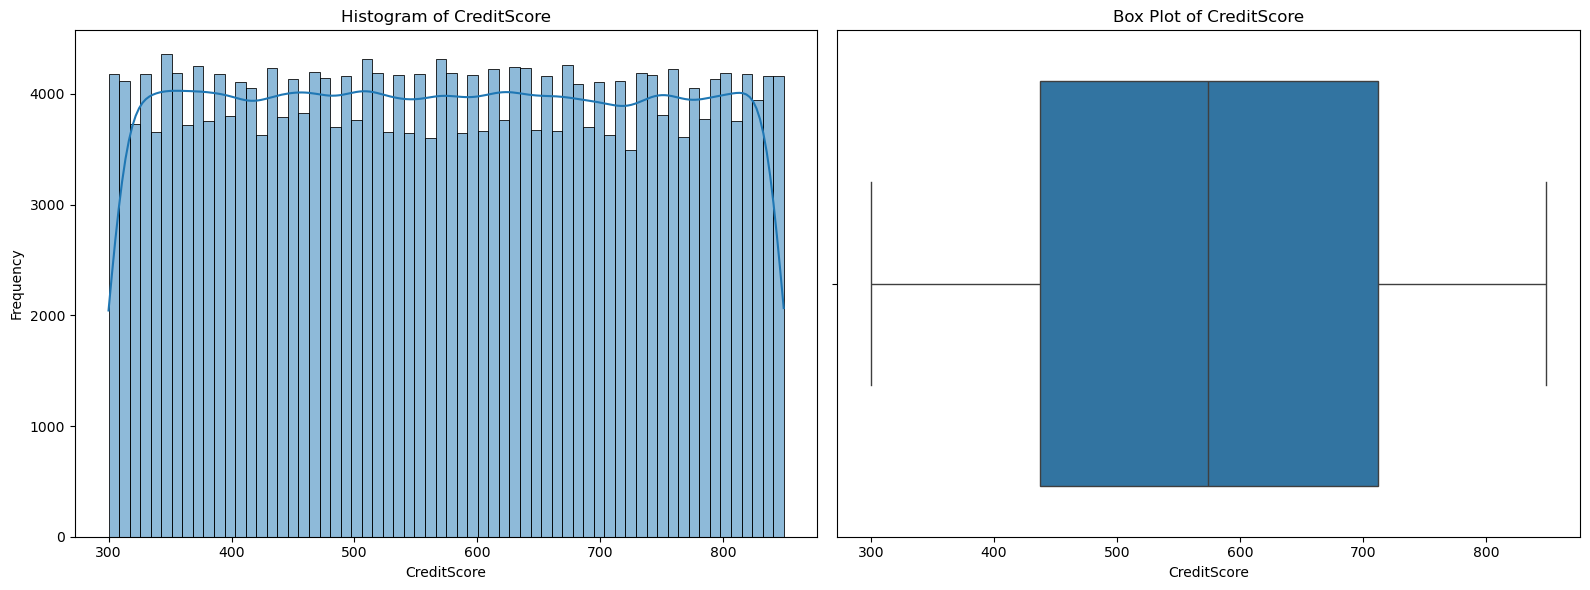

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=data, x="CreditScore", kde=True, ax=axes[0])
axes[0].set_title('Histogram of CreditScore')
axes[0].set_xlabel('CreditScore')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=data, x="CreditScore", ax=axes[1])
axes[1].set_title('Box Plot of CreditScore')
axes[1].set_xlabel('CreditScore')

plt.tight_layout()
plt.show()

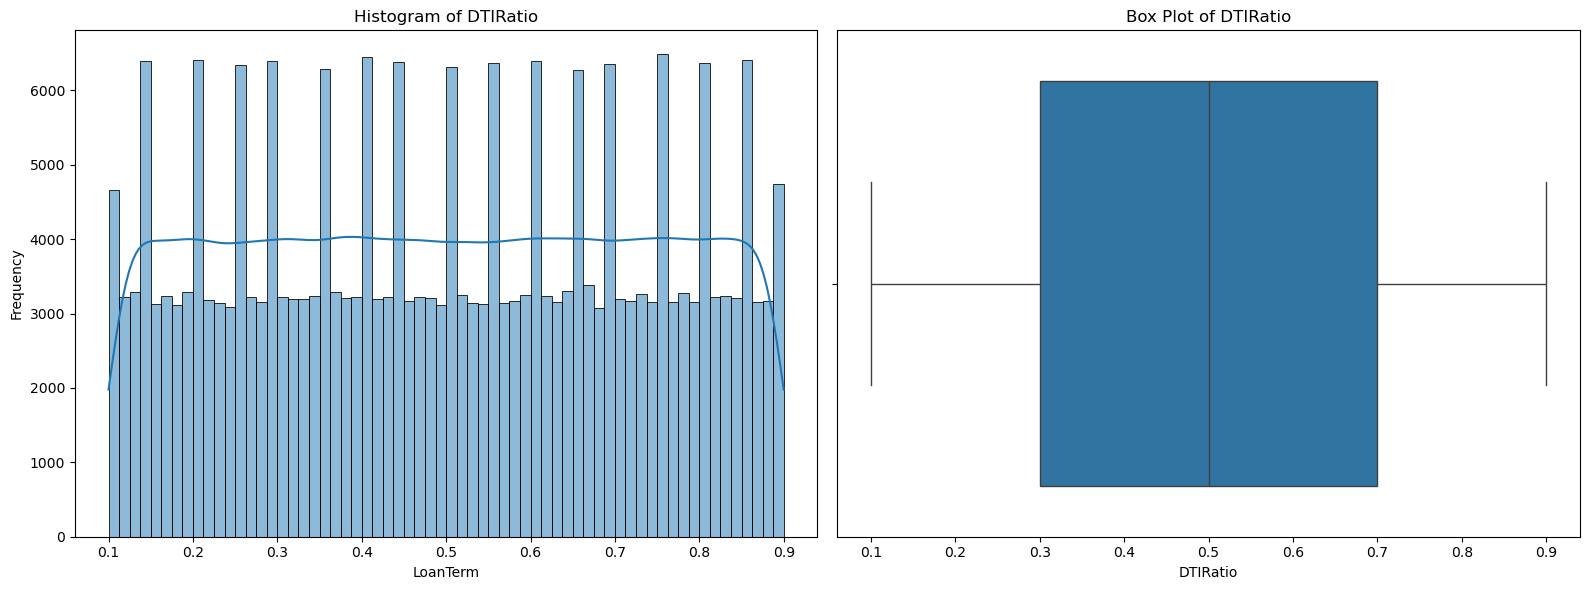

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.histplot(data=data, x="DTIRatio", kde=True, ax=axes[0])
axes[0].set_title('Histogram of DTIRatio')
axes[0].set_xlabel('LoanTerm')
axes[0].set_ylabel('Frequency')

sns.boxplot(data=data, x="DTIRatio", ax=axes[1])
axes[1].set_title('Box Plot of DTIRatio')
axes[1].set_xlabel('DTIRatio')

plt.tight_layout()
plt.show()

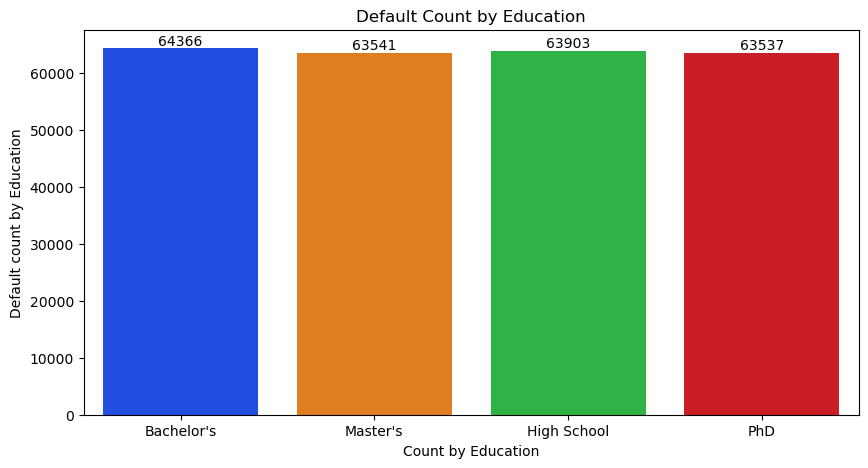

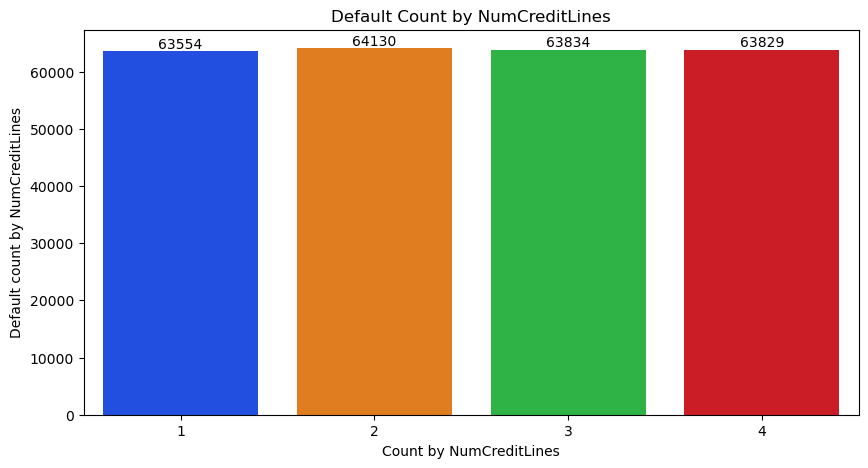

In [30]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Education", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by Education')
plt.ylabel('Default count by Education')
plt.title('Default Count by Education');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="NumCreditLines", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by NumCreditLines')
plt.ylabel('Default count by NumCreditLines')
plt.title('Default Count by NumCreditLines');

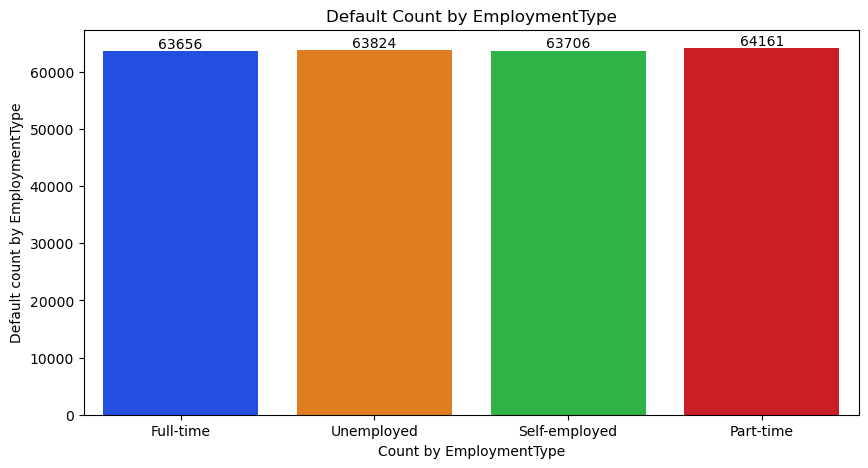

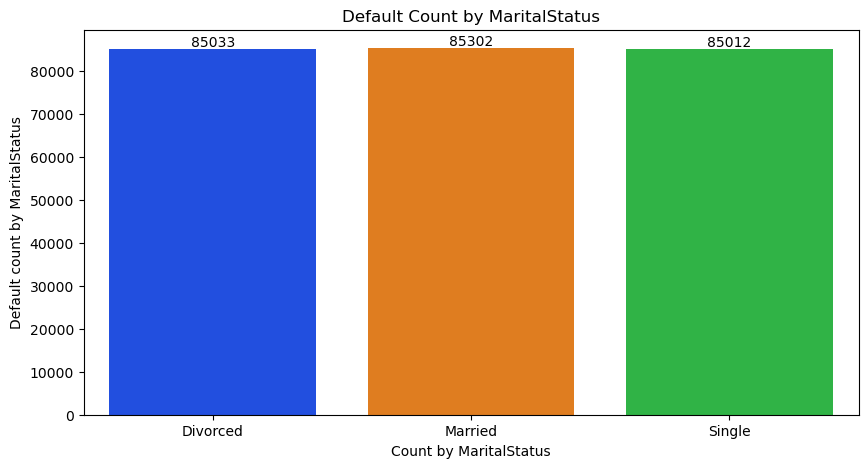

In [31]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="EmploymentType", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by EmploymentType')
plt.ylabel('Default count by EmploymentType')
plt.title('Default Count by EmploymentType');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="MaritalStatus", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by MaritalStatus')
plt.ylabel('Default count by MaritalStatus')
plt.title('Default Count by MaritalStatus');

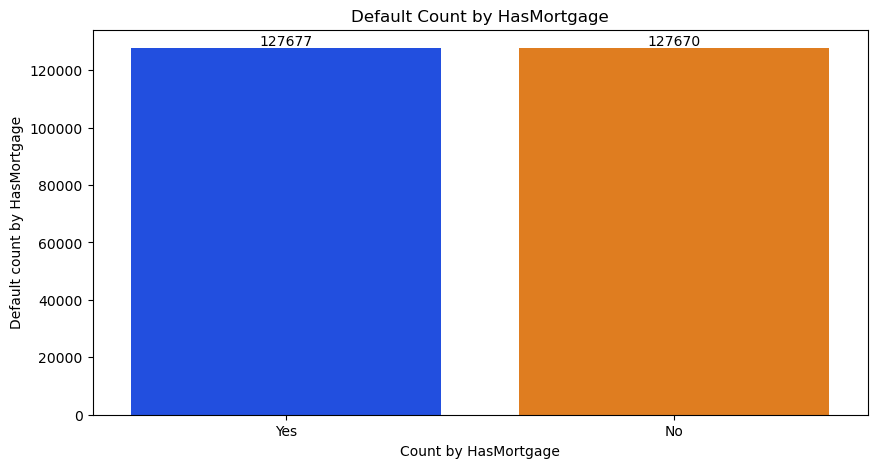

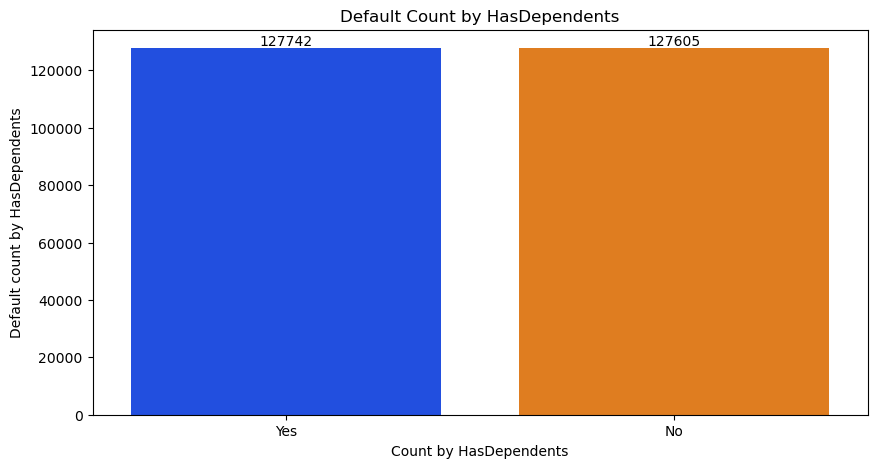

In [32]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasMortgage", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by HasMortgage')
plt.ylabel('Default count by HasMortgage')
plt.title('Default Count by HasMortgage');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasDependents", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by HasDependents')
plt.ylabel('Default count by HasDependents')
plt.title('Default Count by HasDependents');

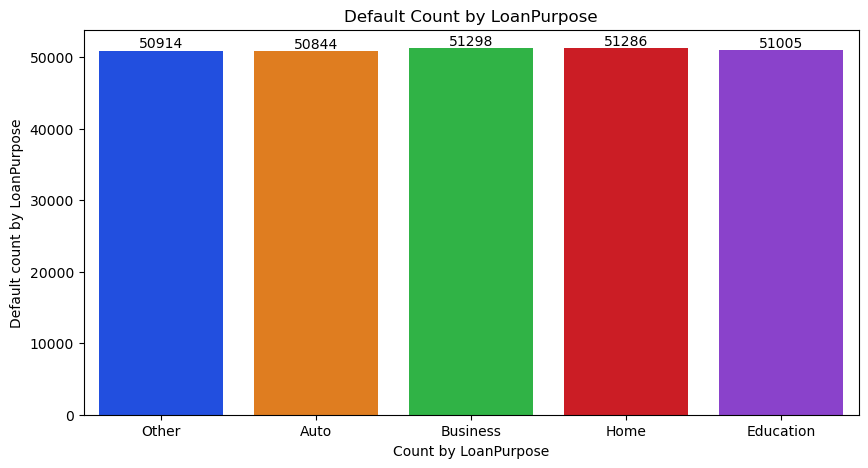

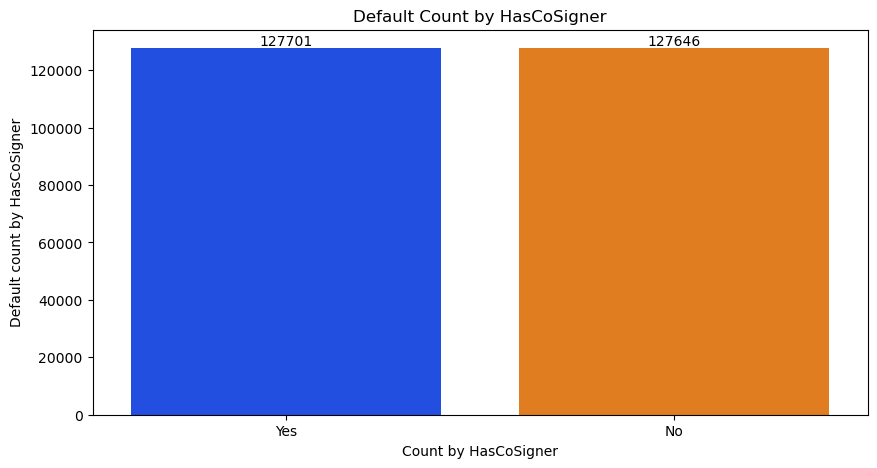

In [33]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="LoanPurpose", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by LoanPurpose')
plt.ylabel('Default count by LoanPurpose')
plt.title('Default Count by LoanPurpose');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasCoSigner", palette='bright', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Count by HasCoSigner')
plt.ylabel('Default count by HasCoSigner')
plt.title('Default Count by HasCoSigner');

# BIVARIATE ANALYSIS

In [35]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_bracket
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult(<=65)
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Elder(>65)


In [36]:
def label (Default):
    if Default == 1:
        return "yes"
    else:
        return "no"
data["label"] = data["Default"].apply(label)
data.head(2)  

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_bracket,label
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult(<=65),no
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Elder(>65),no


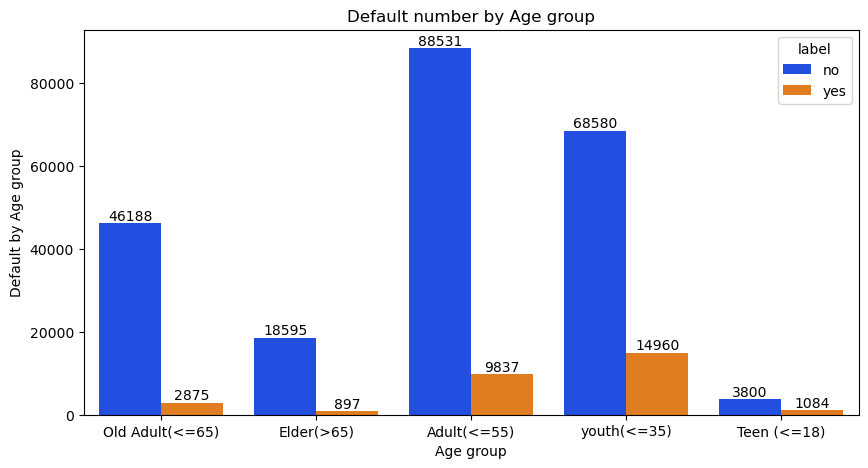

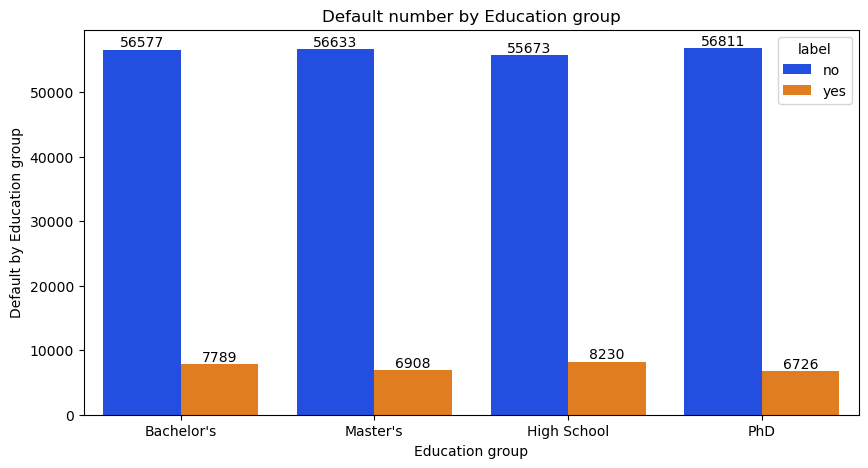

In [37]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="age_bracket", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Age group')
plt.ylabel('Default by Age group')
plt.title('Default number by Age group');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="Education", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('Education group')
plt.ylabel('Default by Education group')
plt.title('Default number by Education group');

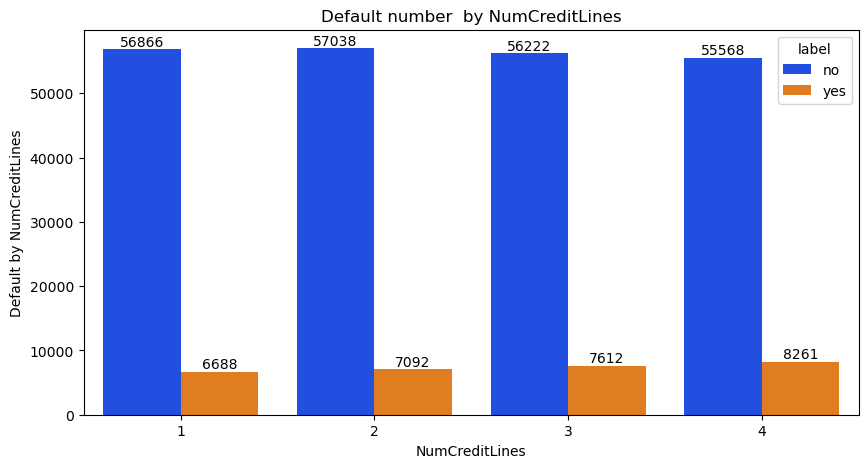

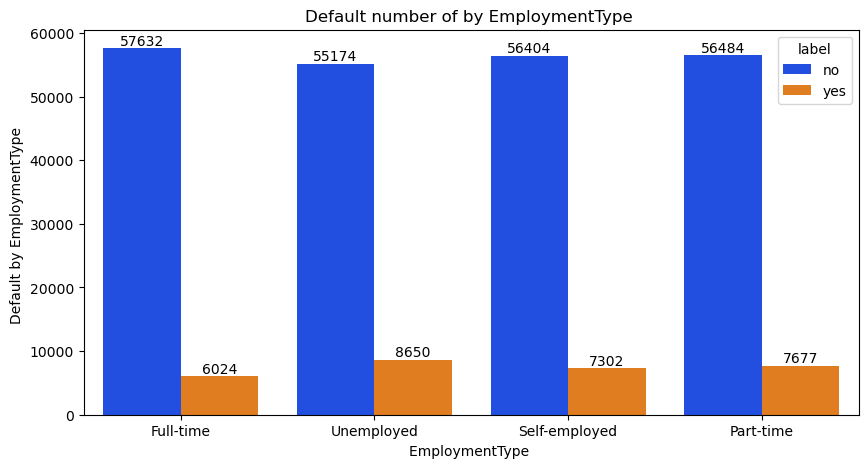

In [38]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="NumCreditLines", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('NumCreditLines')
plt.ylabel('Default by NumCreditLines')
plt.title('Default number  by NumCreditLines');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="EmploymentType", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('EmploymentType ')
plt.ylabel('Default by EmploymentType ')
plt.title('Default number of by EmploymentType ');

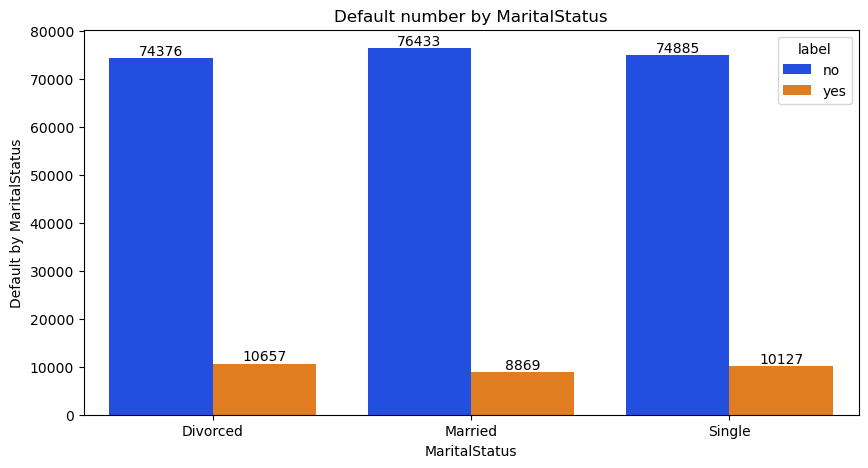

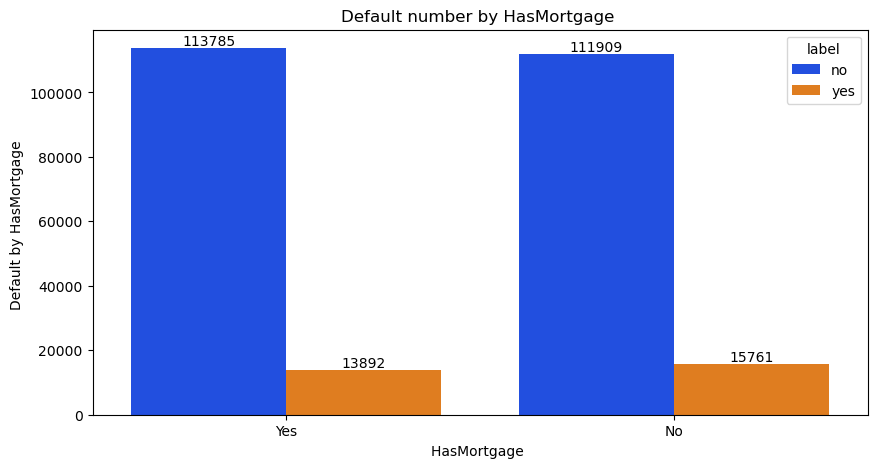

In [39]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="MaritalStatus", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('MaritalStatus')
plt.ylabel('Default by MaritalStatus')
plt.title('Default number by MaritalStatus');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasMortgage", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('HasMortgage ')
plt.ylabel('Default by HasMortgage ')
plt.title('Default number by HasMortgage ');

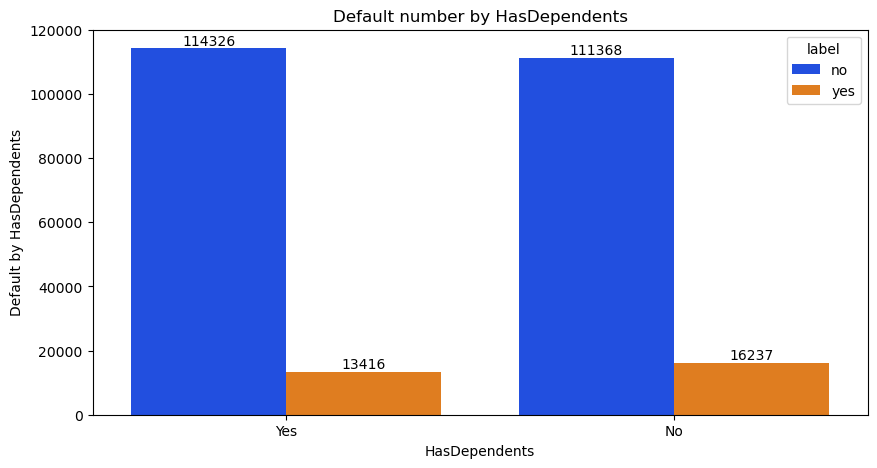

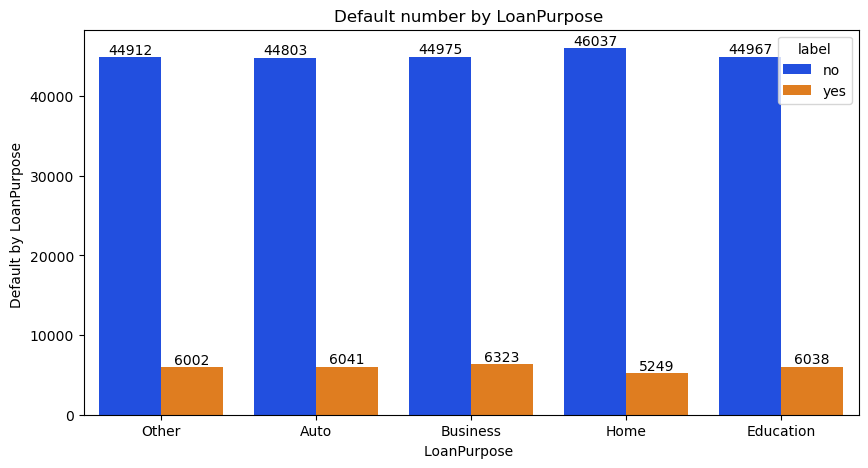

In [40]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasDependents", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('HasDependents')
plt.ylabel('Default by HasDependents')
plt.title('Default number by HasDependents');

plt.figure(figsize=(10,5))
ax=sns.countplot(x="LoanPurpose", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('LoanPurpose ')
plt.ylabel('Default by LoanPurpose ')
plt.title('Default number by LoanPurpose ');

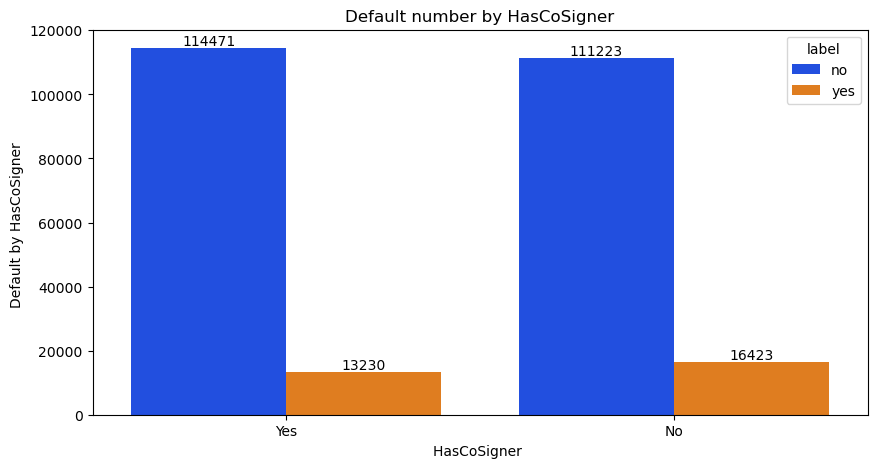

In [41]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="HasCoSigner", palette='bright', hue='label', data=data)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.xlabel('HasCoSigner ')
plt.ylabel('Default by HasCoSigner ')
plt.title('Default number by HasCoSigner');

In [42]:
data["Age"].corr(data["Default"])

-0.16778316487134498

In [43]:
data["CreditScore"].corr(data["Default"])

-0.03416649376077128

In [44]:
data["DTIRatio"].corr(data["Default"])

0.01923598103970831

In [45]:
data["InterestRate"].corr(data["Default"])

0.13127301527989874

# MULTIVARIATE ANALYSIS

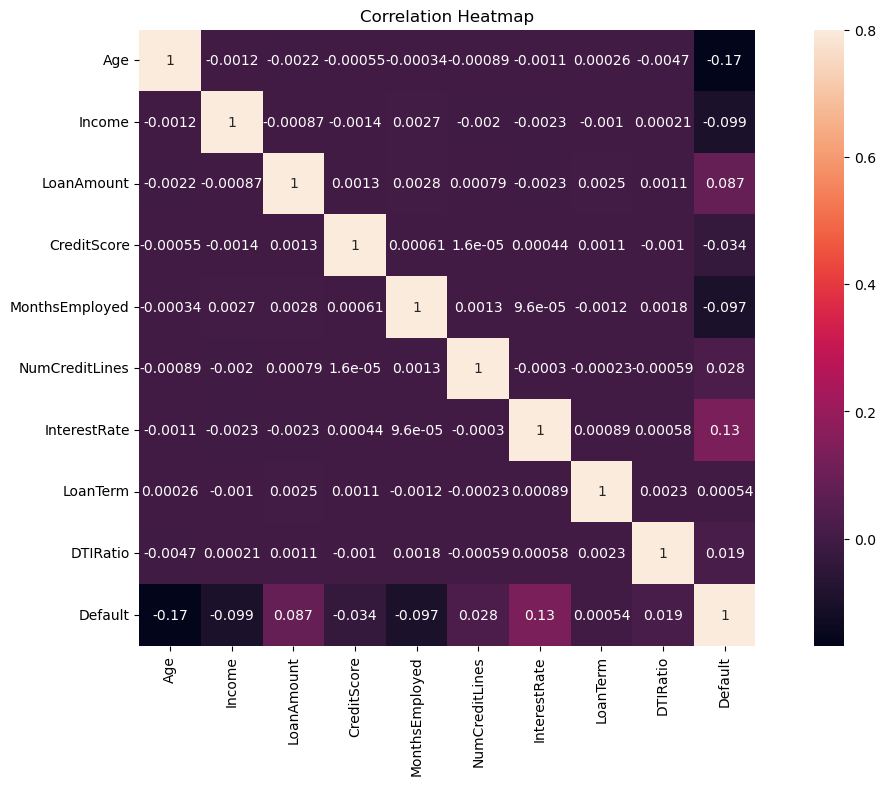

In [47]:
datal = data.select_dtypes(include=[float, int])
a = datal.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(a, vmax=0.8, square=True, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# DATA PREPROCESSING

In [49]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,age_bracket,label
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,Old Adult(<=65),no
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,Elder(>65),no


In [50]:
data.drop(['age_bracket', 'label'], axis= 1, inplace= True)

In [51]:
label =data['Default']

In [52]:
features = data.drop(['Default'], axis=1)

In [53]:
features.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes


In [54]:
label.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

# Encoding categorical Data

In [56]:
categorical_data = data.select_dtypes(include='object')

In [57]:
categorical_data.head(2)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes


In [58]:
categorical_columns = categorical_data.columns.to_list()

In [59]:
categorical_columns

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
encoder= LabelEncoder()

In [62]:
for column_name in categorical_columns:
    features[column_name] = encoder.fit_transform(features[column_name])

In [63]:
features.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1


### MACHINE LEARNING

In [65]:
# SPLIT Trainig and Testing
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size= 0.2, random_state= 42)

In [66]:
# MODEL BUILDING
# LOGISTIC REGRESSION

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

# MODEL EVALUATION

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
report = classification_report(y_test, predictions, digits = 7)
matrix= confusion_matrix(y_test, predictions)

In [70]:
print (report)

              precision    recall  f1-score   support

           0  0.8845566 0.9999779 0.9387327     45170
           1  0.8333333 0.0008475 0.0016932      5900

    accuracy                      0.8845506     51070
   macro avg  0.8589450 0.5004127 0.4702129     51070
weighted avg  0.8786389 0.8845506 0.8304786     51070



In [71]:
print (matrix)

[[45169     1]
 [ 5895     5]]


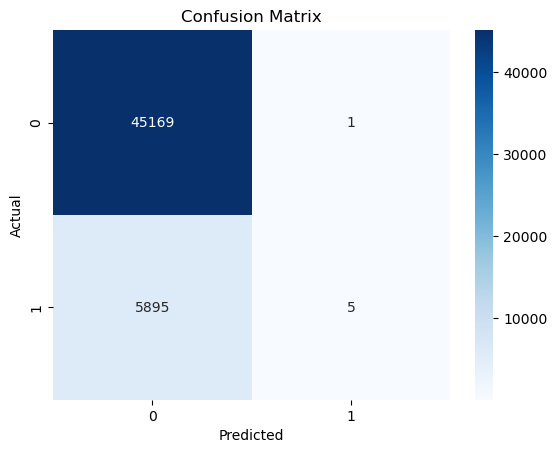

In [72]:
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

In [73]:
scaler= MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0  0.8873900 0.9975426 0.9392477     45170
           1  0.6211604 0.0308475 0.0587760      5900

    accuracy                      0.8858625     51070
   macro avg  0.7542752 0.5141950 0.4990119     51070
weighted avg  0.8566331 0.8858625 0.8375288     51070



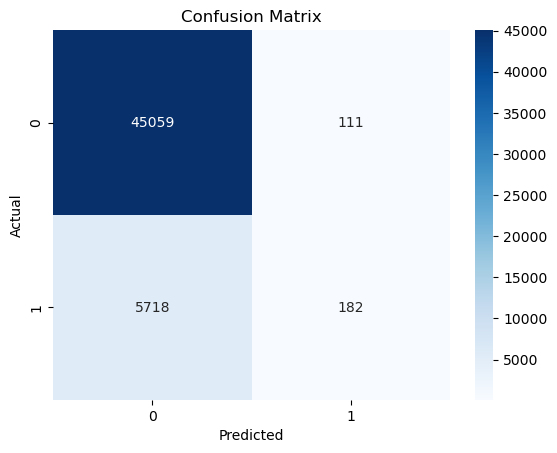

In [74]:
model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits = 7)
matrix= confusion_matrix(y_test, predictions)
print (report)
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

### - We can see the improvements in the class `1` predictions and slightly in the overall accuracy, precision, recall
### - Clearly the class imbalance is affecting the model's performance

              precision    recall  f1-score   support

           0    0.92053   0.87366   0.89648     45170
           1    0.30402   0.42254   0.35362      5900

    accuracy                        0.82154     51070
   macro avg    0.61228   0.64810   0.62505     51070
weighted avg    0.84930   0.82154   0.83376     51070



Text(0.5, 23.52222222222222, 'Actual Value')

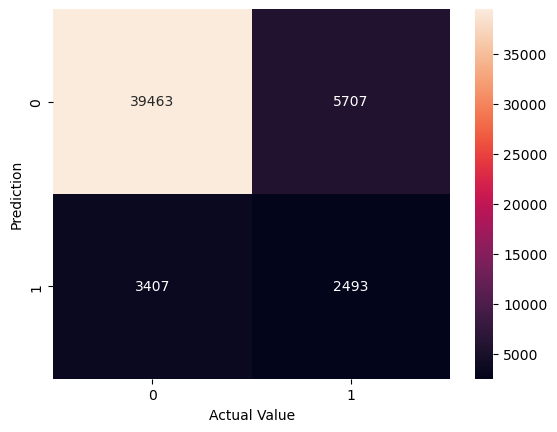

In [76]:
model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value")

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90     45170
           1       0.30      0.42      0.35      5900

    accuracy                           0.82     51070
   macro avg       0.61      0.65      0.63     51070
weighted avg       0.85      0.82      0.83     51070



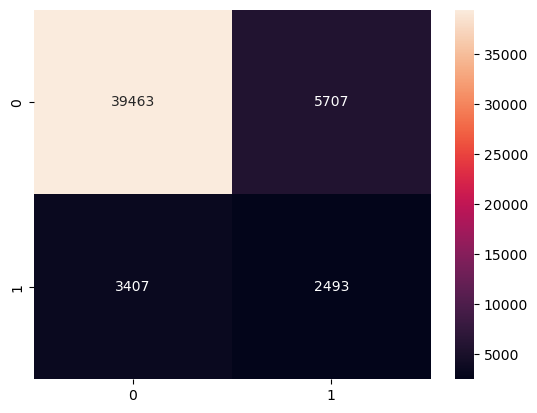

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88     45170
           1       0.28      0.48      0.36      5900

    accuracy                           0.80     51070
   macro avg       0.60      0.66      0.62     51070
weighted avg       0.85      0.80      0.82     51070



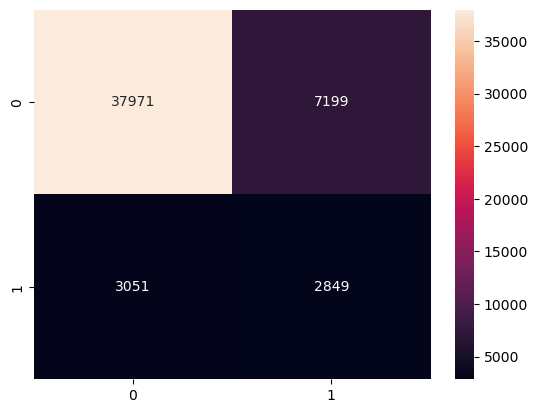

<-- k-Nearest Neighbors -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45170
           1       0.31      0.06      0.11      5900

    accuracy                           0.88     51070
   macro avg       0.60      0.52      0.52     51070
weighted avg       0.82      0.88      0.84     51070



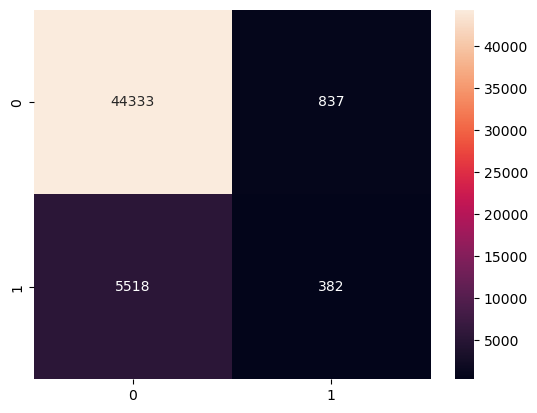

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     45170
           1       0.20      0.20      0.20      5900

    accuracy                           0.81     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.81      0.81      0.81     51070



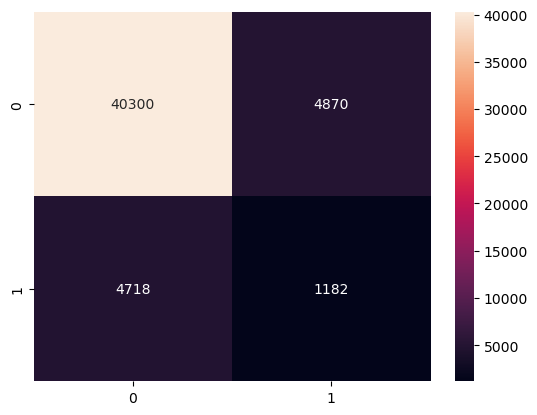

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



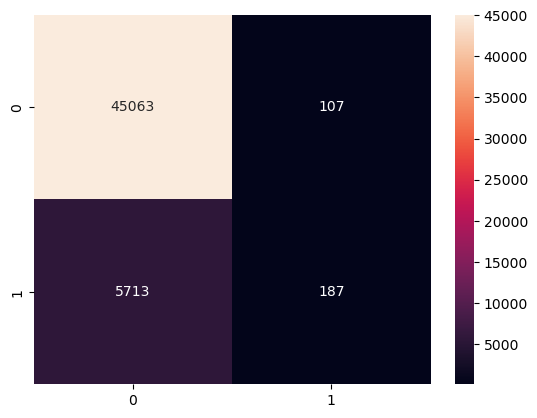

<-- Gradient Boosting -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



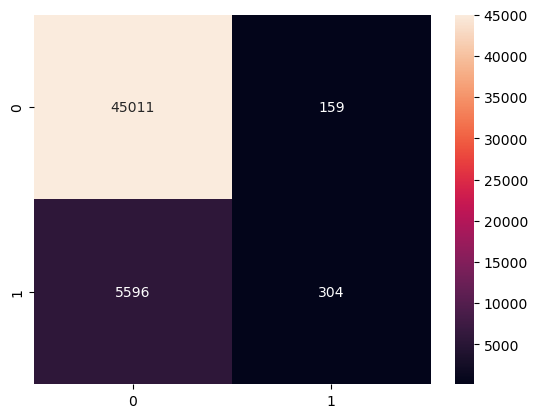

<-- AdaBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.60      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070



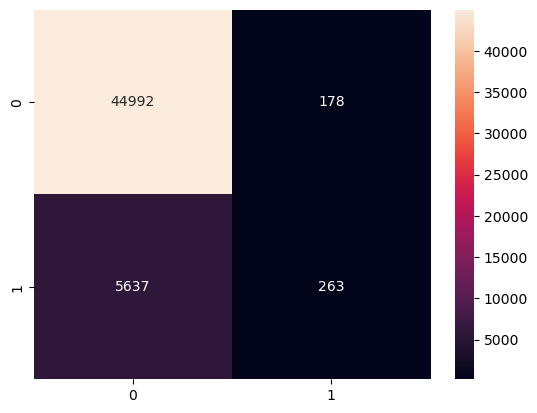

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.54      0.09      0.15      5900

    accuracy                           0.89     51070
   macro avg       0.72      0.54      0.54     51070
weighted avg       0.85      0.89      0.85     51070



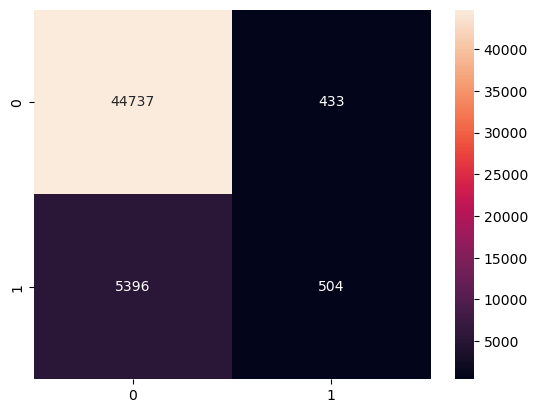

<-- Naive Bayes -->
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.02      0.03      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.51      0.48     51070
weighted avg       0.86      0.89      0.83     51070



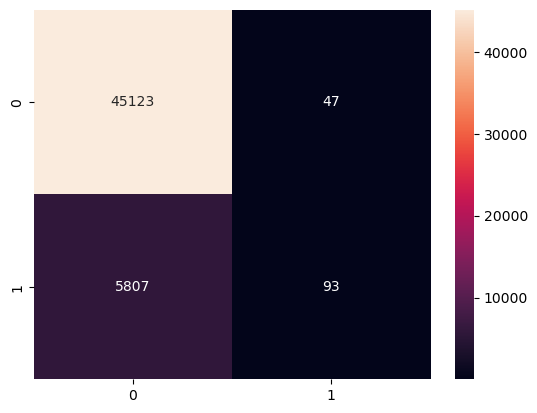

In [77]:
class_weights = {0: 1, 1: 4} 

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost'],
    [GaussianNB(), 'Naive Bayes']
              ]
               
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

### TO Handle Data IMBALANCE,  install imbalanced-learn

In [79]:
 !pip install imbalanced-learn

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
X = data.drop('Default', axis=1)
y = data['Default']

scaler = MinMaxScaler()
X = scaler.fit_transform(features)

# Applying SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [82]:
y_resampled.value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [83]:
y_resampled.value_counts(normalize=True)*100

Default
0    50.0
1    50.0
Name: proportion, dtype: float64

In [84]:
# Splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69     45127
           1       0.69      0.71      0.70     45151

    accuracy                           0.69     90278
   macro avg       0.69      0.69      0.69     90278
weighted avg       0.69      0.69      0.69     90278



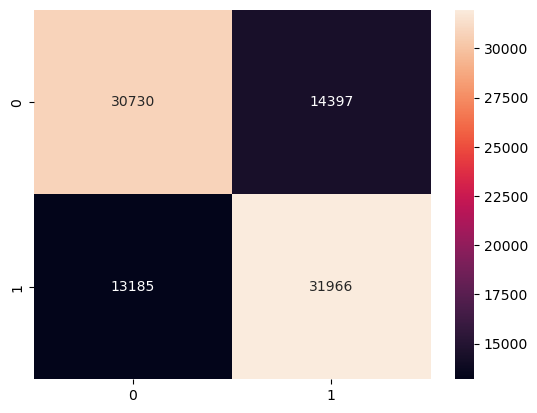

===============SGD Classifiers===============
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68     45127
           1       0.68      0.73      0.70     45151

    accuracy                           0.69     90278
   macro avg       0.69      0.69      0.69     90278
weighted avg       0.69      0.69      0.69     90278



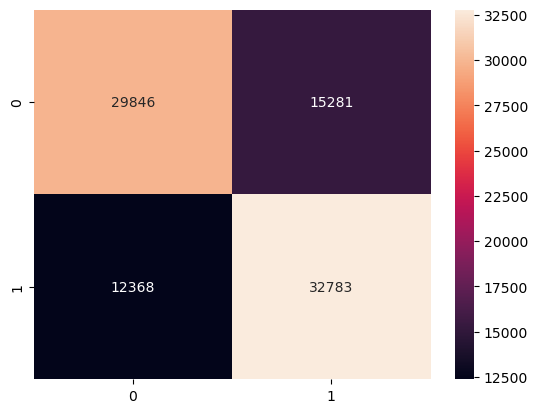

===============k-Nearest Neighbors===============
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.80     45127
           1       0.75      1.00      0.85     45151

    accuracy                           0.83     90278
   macro avg       0.87      0.83      0.83     90278
weighted avg       0.87      0.83      0.83     90278



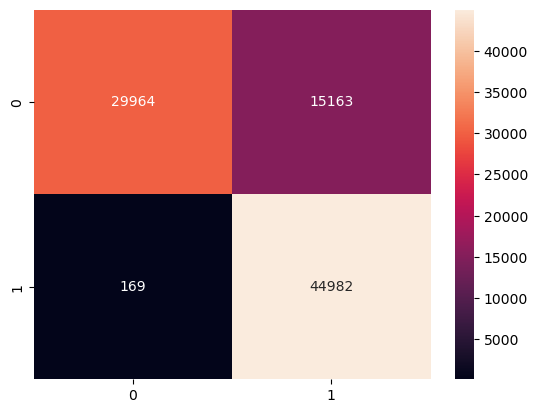

===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     45127
           1       0.83      0.86      0.84     45151

    accuracy                           0.84     90278
   macro avg       0.84      0.84      0.84     90278
weighted avg       0.84      0.84      0.84     90278



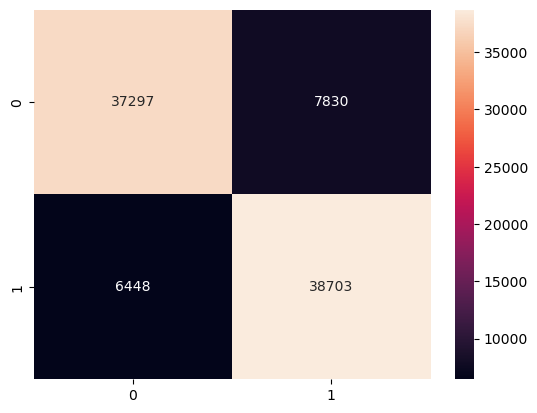

===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     45127
           1       0.95      0.92      0.93     45151

    accuracy                           0.94     90278
   macro avg       0.94      0.94      0.94     90278
weighted avg       0.94      0.94      0.94     90278



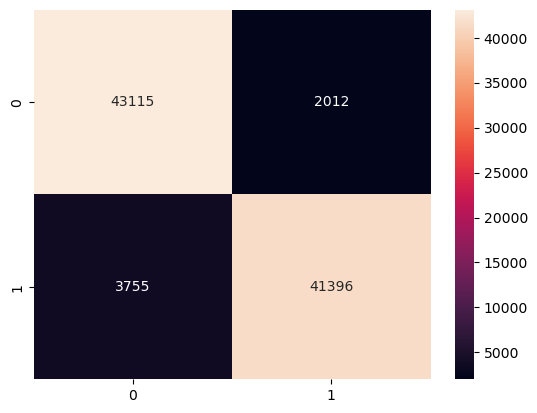

===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     45127
           1       0.95      0.84      0.89     45151

    accuracy                           0.90     90278
   macro avg       0.90      0.90      0.90     90278
weighted avg       0.90      0.90      0.90     90278



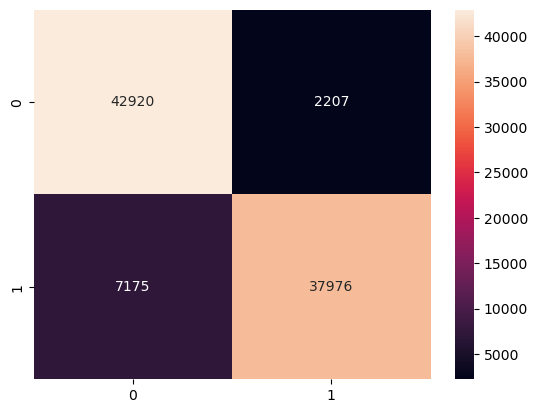

===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     45127
           1       0.76      0.77      0.76     45151

    accuracy                           0.76     90278
   macro avg       0.76      0.76      0.76     90278
weighted avg       0.76      0.76      0.76     90278



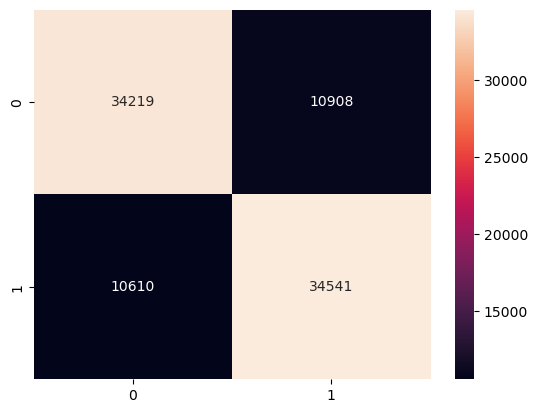

===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     45127
           1       0.99      0.87      0.92     45151

    accuracy                           0.93     90278
   macro avg       0.93      0.93      0.93     90278
weighted avg       0.93      0.93      0.93     90278



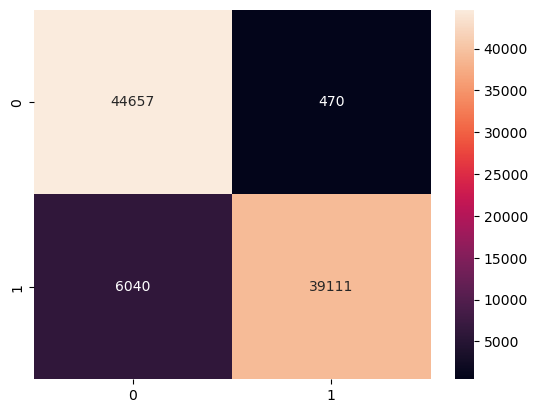

===============Naive Bayes===============
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70     45127
           1       0.70      0.73      0.71     45151

    accuracy                           0.70     90278
   macro avg       0.70      0.70      0.70     90278
weighted avg       0.70      0.70      0.70     90278



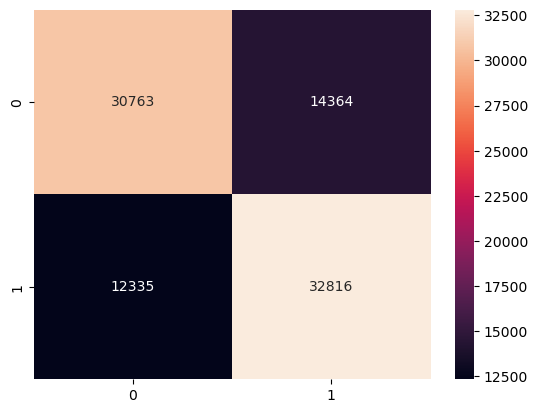

In [85]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
    [KNeighborsClassifier(), 'k-Nearest Neighbors'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost'],
     [GaussianNB(), 'Naive Bayes']
              ]
              
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

## FEATURE RANKING AND SELECTION

In [87]:
# Feature importance for RandomForest
importances = classifiers[4][0].feature_importances_
importances

array([0.13786918, 0.07876777, 0.07691905, 0.0600691 , 0.07866181,
       0.0669105 , 0.09872127, 0.06987058, 0.05850909, 0.06841978,
       0.08754461, 0.02215769, 0.0104329 , 0.01092259, 0.06319999,
       0.0110241 ])

In [88]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [89]:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
0,Age,0.137869
6,InterestRate,0.098721
10,EmploymentType,0.087545
1,Income,0.078768
4,MonthsEmployed,0.078662
2,LoanAmount,0.076919
7,LoanTerm,0.069871
9,Education,0.068420
5,NumCreditLines,0.066911
14,LoanPurpose,0.063200


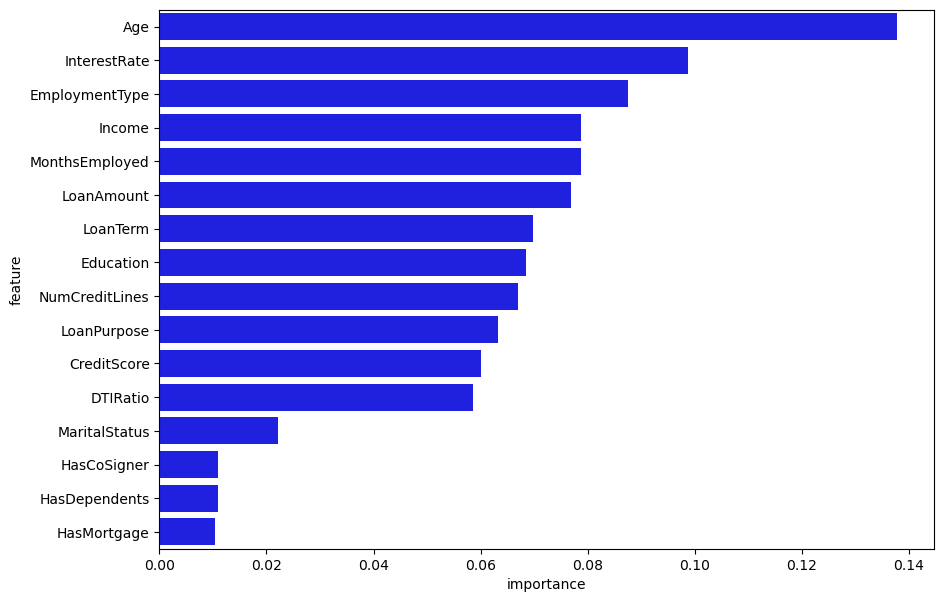

In [90]:
plt.figure(figsize=(10, 7))

sns.barplot(x='importance', y='feature', data=feature_importance_df, color='blue');

# CORRELATION ANALYSIS

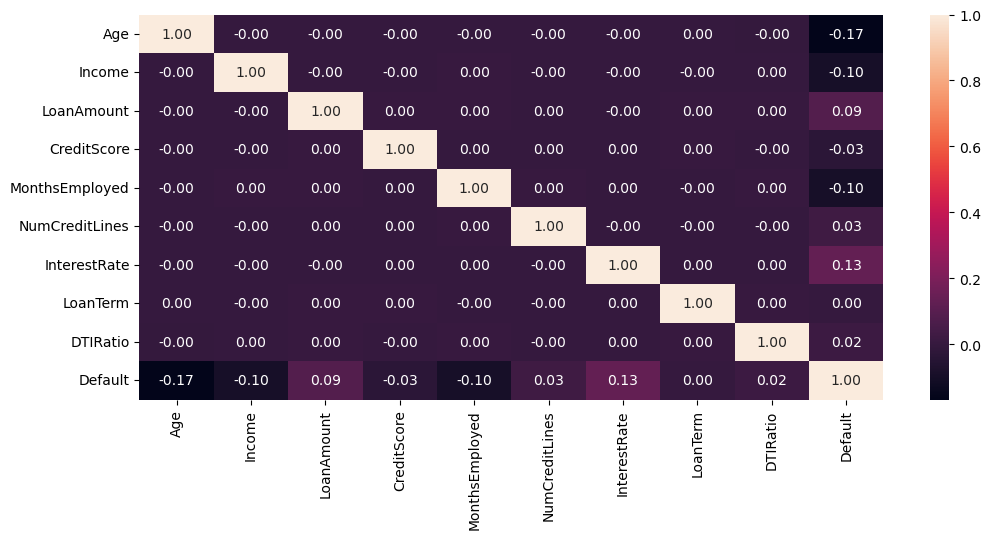

In [92]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f");

# HYPER PARAMETER TUNING

In [94]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

In [96]:
grid_search = GridSearchCV(estimator=classifiers[4][0], param_grid=parameter_grid, cv=5, scoring="recall")

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.show()